<a href="https://colab.research.google.com/github/jjy12163/picchat/blob/main/%ED%91%9C%EC%A0%95%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless
!pip install fer
!pip install google-colab

import cv2
from google.colab.patches import cv2_imshow
from fer import FER
import matplotlib.pyplot as plt
from google.colab import files



Saving tears.jpg to tears.jpg


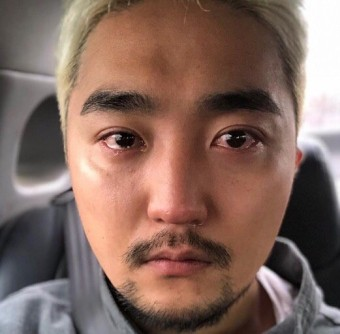

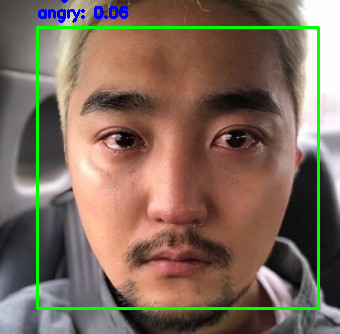

In [ ]:

# 이미지 업로드
uploaded = files.upload()

# 업로드된 파일 이름 가져오기
file_name = list(uploaded.keys())[0]

# 이미지 읽기
img = cv2.imread(file_name)

# 이미지가 제대로 읽혔는지 확인
if img is None:
    print("Error: Unable to read the image.")
else:
    # 이미지 표시
    cv2_imshow(img)

    # 감정 분석 모델 로드
    emotion_detector = FER()

    # 감정 분석 수행
    result = emotion_detector.detect_emotions(img)

    # 분석 결과 표시
    if result:
        for face in result:
            (x, y, w, h) = face["box"]
            emotions = face["emotions"]

            # 얼굴 주위에 사각형 그리기
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # 감정 결과를 이미지 위에 표시
            for emotion, score in emotions.items():
                cv2.putText(img, f"{emotion}: {score:.2f}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                y -= 20

        # 감정 분석 결과 이미지 표시
        cv2_imshow(img)
    else:
        print("No faces detected or unable to detect emotions.")


In [ ]:
!pip install deepface
!pip install opencv-python-headless

Saving 다운로드.jpeg to 다운로드.jpeg


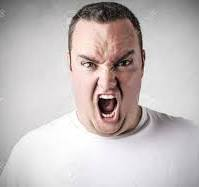

Detected emotions: {'angry': 82.18042744281456, 'disgust': 5.2778423668709043e-08, 'fear': 17.819571067069237, 'happy': 1.7060593051044227e-11, 'sad': 4.99458149077431e-07, 'surprise': 3.862465861841282e-11, 'neutral': 6.981414018731381e-11}


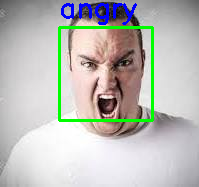

In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# 업로드된 파일 이름 가져오기
file_name = list(uploaded.keys())[0]

# 이미지 읽기
img = cv2.imread(file_name)

# 이미지가 제대로 읽혔는지 확인
if img is None:
    print("Error: Unable to read the image.")
else:
    # 이미지 표시
    cv2_imshow(img)

    # 감정 분석 수행
    results = DeepFace.analyze(img, actions=['emotion'])

    # 분석 결과 표시
    for result in results:
        print("Detected emotions:", result["emotion"])
        dominant_emotion = result["dominant_emotion"]

        # 인식된 얼굴 주위에 사각형 그리기 및 감정 표시
        (x, y, w, h) = result["region"]["x"], result["region"]["y"], result["region"]["w"], result["region"]["h"]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f"{dominant_emotion}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # 감정 분석 결과 이미지 표시
    cv2_imshow(img)
